In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

from pydct.scipy import sdct, isdct
from pydct.tf import sdct_tf, isdct_tf

In [ ]:
example_audio = librosa.core.load(
    librosa.util.example_audio_file(), offset=30, duration=5
)[0]
example_stft = librosa.core.stft(example_audio, n_fft=2048, hop_length=512)
example_sdct = sdct(example_audio, frame_length=2048, frame_step=512)
example_sdct_tf = sdct_tf(example_audio, frame_length=2048, frame_step=512)

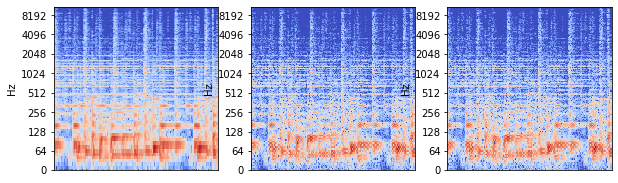

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
C = 1e2  # Hack to force same color palette in plots
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(example_stft)), ax=ax[0], y_axis="log", 
)
librosa.display.specshow(
    librosa.amplitude_to_db(example_sdct * C), ax=ax[1], y_axis="log",
)
librosa.display.specshow(
    librosa.amplitude_to_db(np.transpose(example_sdct_tf * C)), ax=ax[2], y_axis="log",
)

In [ ]:
(
    example_audio.shape,
    isdct(example_sdct, frame_step=512).shape,
    isdct_tf(example_sdct_tf, frame_step=512).shape,
)

((110250,), (110080,), TensorShape([110080]))